<a href="https://colab.research.google.com/github/takafumi12/gigwork_quest_orange_team/blob/kotani/giguquest_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# test
# コマンド集
- Ctrl+ M H でショートカットを表示
- Ctrl+ M Y でコードセルに変換
- Ctrl+ M M でコマンドセルに変換
- Ctrl+ Alt+G でGitにコピーを保存(自分で設定)

In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 8.1MB/s 


In [ ]:
import pydicom
path = pydicom.data.get_testdata_file('RG1_J2KR.dcm')
print(path)

RG1_J2KR.dcm: 4.29MB [00:00, 4.63MB/s]                            

/root/.pydicom/data/RG1_J2KR.dcm


In [ ]:
dataset = pydicom.filereader.dcmread(path)
data = dataset[(0x0010,0x0010)]
print(type(data))

<class 'pydicom.dataelem.DataElement'>


In [ ]:
# dicomファイルのメタデータを取得
# dirの引数指定で文字列検索

print(dataset.dir())
print(dataset.dir('Number'))

['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'CollimatorGridName', 'CollimatorLeftVerticalEdge', 'CollimatorLowerHorizontalEdge', 'CollimatorRightVerticalEdge', 'CollimatorShape', 'CollimatorUpperHorizontalEdge', 'Columns', 'ContentDate', 'ContentTime', 'DateOfLastCalibration', 'DerivationDescription', 'DeviceSerialNumber', 'DistanceSourceToDetector', 'Exposure', 'ExposureTime', 'FilterType', 'FocalSpots', 'GeneratorPower', 'HighBit', 'ImageAndFluoroscopyAreaDoseProduct', 'ImageComments', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceCreatorUID', 'InstanceNumber', 'InstitutionName', 'InstitutionalDepartmentName', 'KVP', 'LossyImageCompression', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'OtherPatientIDs', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'PlateType', 'PostprocessingFunction', 'ProcessingFunction',

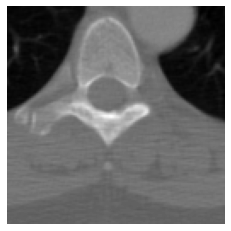

In [ ]:
# DICOMをJPEGに変換する
import matplotlib.pyplot as plt

filename = pydicom.data.get_testdata_files('CT_small.dcm')[0]
ds = pydicom.dcmread(filename)
im = ds.pixel_array

fig, ax = plt.subplots()
ax.imshow(im, cmap='gray')
ax.set_axis_off()
plt.show()

In [ ]:
cd

/root


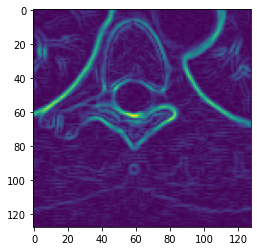

In [14]:
import cv2
import numpy as np

dx = cv2.Sobel(im, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(im, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)

plt.imshow(grad)

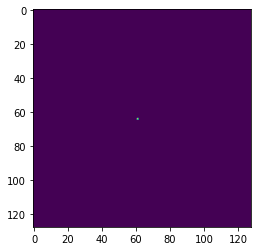

In [33]:
im_nom = im//np.max(im)*255
ret, img_thresh = cv2.threshold(im_nom, 0.1, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh)

In [27]:
img = im_nom
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

error: ignored